<a href="https://colab.research.google.com/github/stivenbg/PINNS/blob/main/biais2_lmt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Mon code fonctionne correctement sur la prédiction de U. Maintenant je l'adapte à éta. niveau fonction coût : La dimension FEM c'est ok. La dimension BC pas ok. La dimension PDE pas ok.

In [1]:
pip install PyDrive

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [10]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive


In [12]:
gauth=GoogleAuth()
drive = GoogleDrive(gauth)

In [13]:
gauth.LocalWebserverAuth()

InvalidConfigError: ignored

In [14]:

from pydrive.drive import GoogleDrive
drive = GoogleDrive(gauth)

In [5]:
# Create folder.
folder_metadata = {
    'title' : '<your folder name here>',
    # The mimetype defines this new file as a folder, so don't change this.
    'mimeType' : 'application/vnd.google-apps.folder'
}
folder = drive.CreateFile(folder_metadata)
folder.Upload()



# Get folder info and print to screen.
folder_title = folder['title']
folder_id = folder['id']
print('title: %s, id: %s' % (folder_title, folder_id))

# Upload file to folder.
f = drive.CreateFile({"parents": [{"kind": "drive#fileLink", "id": folder_id}]})

# Make sure to add the path to the file to upload below.
f.SetContentFile('<file path here>')
f.Upload()

InvalidConfigError: ignored

In [16]:
import torch
import torch.nn as nn
import pandas as pd
from torch.autograd import Variable
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
import numpy as np

In [ ]:
#Je solve d'abord U ensuite je m'adapte à eta 

In [ ]:
#Ici je loads mes data pour contraindre ma solution à respecter la FEM
from google.colab import files
uploaded = files.upload()

ModuleNotFoundError: ignored

In [64]:
#a cause de la contrainte de la machine locale j'accède aux fichier par github
url='https://raw.githubusercontent.com/stivenbg/PINNS/main/nodes_colocations.csv'
df = pd.read_csv(url)
#url_nodes='https://github.com/stivenbg/PINNS/blob/main/nodes_colocations.xlsx'
#df = pd.read_csv(url_nodes)
print(df)

             1         0
0     1.000000  1.000000
1     0.000000  1.000000
2     0.000000  0.000000
3     1.000000  0.020000
4     1.000000  0.040000
...        ...       ...
3429  0.465490  0.298860
3430  0.989930  0.010072
3431  0.010072  0.010072
3432  0.989930  0.989930
3433  0.010036  0.989960

[3434 rows x 2 columns]


In [66]:
#maillages fem, leur meshgrid reconstruit le maillage
#x3=df.loc[:,1];  #axe 1 Ici x3 et x4 sont des series
#x4=df.loc[:,0];  #axe 2

x3=df.loc[0:,'1'];  #axe 1 Ici x3 et x4 sont des series
x4=df.loc[0:,'0'];  #axe 2


x3=x3.to_numpy() #ici je la convertie en ndarray parce que c'est une serie
#x3=np.insert(x3, 0, 1) #je rajoute le premier élement qui manque, disparu pendant l'importation avec pandas
x4=x4.to_numpy()
#x4=np.insert(x4, 0, 0) #dimension (3435,) on va transformer ce vecteur en dimension (3435,1) ave la suite
x3=np.transpose(np.array([x3]))
x4=np.transpose(np.array([x4]))
X2, Y2 = np.meshgrid(x3,x4)


In [24]:
#Ici je recupère le maillage
import io
df = pd.read_excel(io.BytesIO(uploaded['nodes_colocations.xlsx']))
print(df);

NameError: ignored

In [87]:
#a cause de la contrainte de la machine localen j'accède aux fichier par github
url='https://raw.githubusercontent.com/stivenbg/PINNS/main/nouvelle_simu_enfin_nov.csv'
df = pd.read_csv(url)
#url_nodes='https://github.com/stivenbg/PINNS/blob/main/nodes_colocations.xlsx'
#df = pd.read_csv(url_nodes)
#print(df)

In [88]:
df

,0.40351,0.40351.1,1.2038e-07,0.40351.2
0,0.58286,0.58286,-9.246900e-08,0.58286
1,0.37138,0.37138,-1.102000e-08,0.37138
2,0.19203,0.19203,-2.241900e-07,0.19203
3,0.40374,0.40374,1.217900e-07,0.40374
4,0.40436,0.40436,1.260000e-07,0.40436
...,...,...,...,...
3429,0.28857,0.28857,-6.469500e-08,0.28857
3430,0.40337,0.40337,1.203900e-07,0.40337
3431,0.19215,0.19215,-2.240200e-07,0.19215
3432,0.58249,0.58249,-9.247500e-08,0.58249


In [75]:
#a cause de la contrainte de la machine localen j'accède aux fichier par github
url='https://raw.githubusercontent.com/stivenbg/PINNS/main/nodes_colocations.xlsx'
df = pd.read_csv(url)
#url_nodes='https://github.com/stivenbg/PINNS/blob/main/nodes_colocations.xlsx'
#df = pd.read_csv(url_nodes)
print(df)

UnicodeDecodeError: ignored

In [ ]:
#Importation des données de simulation
from google.colab import files
uploaded = files.upload()

Saving nouvelle_simu_enfin_nov.xlsx to nouvelle_simu_enfin_nov (1).xlsx


In [89]:
df

,0.40351,0.40351.1,1.2038e-07,0.40351.2
0,0.58286,0.58286,-9.246900e-08,0.58286
1,0.37138,0.37138,-1.102000e-08,0.37138
2,0.19203,0.19203,-2.241900e-07,0.19203
3,0.40374,0.40374,1.217900e-07,0.40374
4,0.40436,0.40436,1.260000e-07,0.40436
...,...,...,...,...
3429,0.28857,0.28857,-6.469500e-08,0.28857
3430,0.40337,0.40337,1.203900e-07,0.40337
3431,0.19215,0.19215,-2.240200e-07,0.19215
3432,0.58249,0.58249,-9.247500e-08,0.58249


In [92]:
solution_EF


In [102]:
import io
#df = pd.read_excel(io.BytesIO(uploaded['nouvelle_simu_enfin_nov.xlsx']))
print(df);
solution_EF=df.loc[:,'0.40351'].to_numpy()
solution_EF=np.insert(solution_EF, 0, 0.40351)

solution_PBDW= df.loc[:,'0.40351.1'].to_numpy()
solution_PBDW=np.insert(solution_PBDW, 0, 0.40351)


solution_PBDW_eta=df.loc[:,'1.2038e-07'].to_numpy()
solution_PBDW_eta=np.insert(solution_PBDW_eta, 0, 1.2038e-07)


solution_PBDW_z=df.loc[:,'0.40351.2'].to_numpy()
solution_PBDW_z=np.insert(solution_PBDW_z, 0, 0.40351)



#solution_EF_et_PBDW=df.loc[0:1,'solution_EF'].to_numpy()


#solution_EF_et_PBDW=df.loc[:,'solution_EF':'solution_PBDW'].to_numpy()

      0.40351  0.40351.1    1.2038e-07  0.40351.2
0     0.58286    0.58286 -9.246900e-08    0.58286
1     0.37138    0.37138 -1.102000e-08    0.37138
2     0.19203    0.19203 -2.241900e-07    0.19203
3     0.40374    0.40374  1.217900e-07    0.40374
4     0.40436    0.40436  1.260000e-07    0.40436
...       ...        ...           ...        ...
3429  0.28857    0.28857 -6.469500e-08    0.28857
3430  0.40337    0.40337  1.203900e-07    0.40337
3431  0.19215    0.19215 -2.240200e-07    0.19215
3432  0.58249    0.58249 -9.247500e-08    0.58249
3433  0.37127    0.37127 -1.102100e-08    0.37127

[3434 rows x 4 columns]


In [ ]:
#parametter
mu=6.6
epsilon=0.0001

# We consider Net as our solution u_theta(x,t)

"""
When forming the network, we have to keep in mind the number of inputs and outputs
In ur case: #inputs = 2 (x,t)
and #outputs = 1

You can add ass many hidden layers as you want with as many neurons.
More complex the network, the more prepared it is to find complex solutions, but it also requires more data.

Let us create this network:
min 5 hidden layer with 5 neurons each.
"""

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.hidden_layer1 = nn.Linear(2,50)
        self.hidden_layer2 = nn.Linear(50,50)
        self.hidden_layer3 = nn.Linear(50,50)
        self.hidden_layer4 = nn.Linear(50,50)
        self.hidden_layer5 = nn.Linear(50,50)

        self.output_layer = nn.Linear(50,1)

    def forward(self, x,t):
        inputs = torch.cat([x,t],axis=1) # combined two arrays of 1 columns each to one array of 2 columns
        layer1_out = torch.tanh(self.hidden_layer1(inputs))
        layer2_out = torch.tanh(self.hidden_layer2(layer1_out))
        layer3_out = torch.tanh(self.hidden_layer3(layer2_out))
        layer4_out = torch.tanh(self.hidden_layer4(layer3_out))
        layer5_out = torch.tanh(self.hidden_layer5(layer4_out))


        output = self.output_layer(layer3_out)
        return output

In [ ]:
#parametter
mu=6.6
epsilon=0.0001

# We consider Net as our solution u_theta(x,t)

"""
When forming the network, we have to keep in mind the number of inputs and outputs
In ur case: #inputs = 2 (x,t)
and #outputs = 1

You can add ass many hidden layers as you want with as many neurons.
More complex the network, the more prepared it is to find complex solutions, but it also requires more data.

Let us create this network:
min 5 hidden layer with 5 neurons each.
"""

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.hidden_layer1 = nn.Linear(2,20)
        self.hidden_layer2 = nn.Linear(20,20)
        self.hidden_layer3 = nn.Linear(20,20)
        self.hidden_layer4 = nn.Linear(20,20)
        self.hidden_layer5 = nn.Linear(20,20)


        self.output_layer = nn.Linear(20,1)

    def forward(self, x,t):
        inputs = torch.cat([x,t],axis=1) # combined two arrays of 1 columns each to one array of 2 columns
        layer1_out = torch.tanh(self.hidden_layer1(inputs))
        layer2_out = torch.tanh(self.hidden_layer2(layer1_out))
        layer3_out = torch.tanh(self.hidden_layer3(layer2_out))
        layer4_out = torch.tanh(self.hidden_layer4(layer3_out))
        layer5_out = torch.tanh(self.hidden_layer5(layer4_out))

        output = self.output_layer(layer3_out)
        return output

In [ ]:
### PDE as loss function. Thus would use the network which we call as u_theta
def f(x,t, net): #ici net c'est eta
    u = net(x,t) # the dependent variable u is given by the network based on independent variables x,t
    ## Based on our f = du/dx - 2du/dt - u, we need du/dx and du/dt
    #u_x = torch.autograd.grad(u.sum(), x, create_graph=True)[0]
    #u_xx = torch.autograd.grad(u_x.sum(), x, create_graph=True)[0]
    #u_t = torch.autograd.grad(u.sum(), t, create_graph=True)[0]

    u_x = torch.autograd.grad(u.sum(), x, create_graph=True)[0]
    u_xx = torch.autograd.grad(u_x.sum(), x, create_graph=True)[0]
    u_t = torch.autograd.grad(u.sum(), t, create_graph=True)[0]
    u_yy = torch.autograd.grad(u_t.sum(), t, create_graph=True)[0]
    q= mu*(2*torch.tensor(x)**2 + torch.tensor(torch.exp(t)))
    pde= (u_xx+u_yy)+mu**2*u - mu*q #edp verifiee par u
    #pde2=()    #edp verifiee par eta
    return pde

    #u_xx_1 = u_xx[:,0]
    #u_xx_2 = u_xx[:,1]
    #q=np.vectorize(-2*x_1**2 - math.exp(x_2))
    #pde =-(u_xx+u_tt)-mu**2*u - mu*Variable(torch.from_numpy(x).float(), requires_grad=True).to(device)**2 - torch.exp(Variable(torch.from_numpy(x).float(), requires_grad=True).to(device))
    #pde = u_x - 2*u_t - u
    #pde= -(u_xx+u_tt)-mu**2*u +q  #ok ok
    #pde= -mu**2*u -(u_xx_1) #+u_xx_2)
    #pde= -(u_xx)-mu**2*u
    #pde=torch.tensor(1+epsilon*mu, dtype=torch.complex32)*(u_xx+u_tt)-mu**2*u
  

In [ ]:
a6=0
a_1 = 1 
a_2 = 1

def training_bc(N_u):
  #Dans le cas de mon pb toutes les BC sont nulles
  #a_1 = 0
  #a_2 = 0
  # compute u based on BC
  #u_bc = 60*np.exp(-3*x_bc)
  u_bc = a6*np.sin(a_1 * np.pi *X2) * np.sin(a_2 * np.pi *Y2) #nul de la dimension qu'il faut 
  leftedge_x = np.hstack((X2[:,0][:,None], Y2[:,0][:,None])) #côté gauche
  leftedge_u = u_bc[:,0][:,None]
  rightedge_x = np.hstack((X2[:,-1][:,None], Y2[:,-1][:,None])) #côté droit
  rightedge_u = u_bc[:,-1][:,None]
  topedge_x = np.hstack((X2[0,:][:,None], Y2[0,:][:,None])) #côté haut
  topedge_u = u_bc[0,:][:,None]
  bottomedge_x = np.hstack((X2[-1,:][:,None], Y2[-1,:][:,None])) #côté bas
  bottomedge_u = u_bc[-1,:][:,None]
  all_x_bc = np.vstack([leftedge_x, rightedge_x, bottomedge_x, topedge_x]) #concatenation horizontale des coordonnées de tous les côtés
  all_u_bc =a6* np.vstack([leftedge_u, rightedge_u, bottomedge_u, topedge_u])  #Les valeurs aux bords du champ primal
  #choose random N_u points for training
  idx = np.random.choice(all_x_bc.shape[0], N_u, replace=False) 

  all_x_bc = all_x_bc[idx[0:N_u], :] #choose indices from  set 'idx' (x,t)
  all_u_bc = all_u_bc[idx[0:N_u],:]    #choose corresponding u

  return all_x_bc, all_u_bc


In [ ]:
#Ici je convertie mes data pour qu'elles soient exploitables
N_u=2000
pt_bc, u_bc = training_bc(N_u)
#x_bc,t_bc = pt_bc[:,0],pt_bc[:,1] pas bon ici, il nous faut un format ligne colonne
#np.transpose(np.array([pt_bc[:,0]])) on applique cette transformation pour convertir
x_bc,t_bc = np.transpose(np.array([pt_bc[:,0]])),np.transpose(np.array([pt_bc[:,1]]))

pt_x_fem1 = Variable(torch.from_numpy(x3).float(), requires_grad=False).to(device) 
pt_x_fem2= Variable(torch.from_numpy(x4).float(), requires_grad=False).to(device)
pt_u_fem = Variable(torch.from_numpy(solution_EF).float(), requires_grad=False).to(device) #ici je remplace u_fem par eta
pt_eta_pbdw = Variable(torch.from_numpy(solution_PBDW_eta).float(), requires_grad=False).to(device)
pt_z = Variable(torch.from_numpy(solution_PBDW_z).float(), requires_grad=False).to(device)

pt_x_bc = Variable(torch.from_numpy(x_bc).float(), requires_grad=False).to(device)
pt_t_bc = Variable(torch.from_numpy(t_bc).float(), requires_grad=False).to(device)
pt_u_bc = Variable(torch.from_numpy(u_bc).float(), requires_grad=False).to(device)
#pt_u_bc = Variable(torch.from_numpy(ms_u_bc).float(), requires_grad=False).to(device)

In [ ]:
#q= mu*(2*torch.tensor(pt_x_fem1)**2 + torch.tensor(torch.exp(pt_x_fem2)));
#q.shape

In [ ]:

def TRAINING(iterations):
  ### (2) Model

### (3) Training / Fitting
  #iterations = 2000

  previous_validation_loss = 99999999.0
  #loss.data=torch.tensor([[100000]])
  for epoch in range(iterations):
    optimizer.zero_grad() # to make the gradients zero

    #Loss based on high fidelity FEM simulation #OK
    #Ici je vais fit la sortie du réseau NN(xfem1,xfem2) à eta_fem.


    net_fem_out=net(pt_x_fem1, pt_x_fem2)
    #mse_fem=mse_cost_function(net_fem_out-pt_z, pt_eta_pbdw ) #je fit eta ok
    mse_fem=mse_cost_function(net_fem_out, pt_eta_pbdw ) #je fit u ok


    # Loss based on PDE #Trouver un moyen de faire la colocation sur les points de maillage EF afin de pouvoir évaluer les valeurs de Z à soustraire
    x_collocation = np.random.uniform(low=0, high=1, size=(12000,1)) #x1
    t_collocation = np.random.uniform(low=0, high=1, size=(12000,1)) #x2
    all_zeros = np.zeros((12000,1))
    pt_x_collocation = Variable(torch.from_numpy(x_collocation).float(), requires_grad=True).to(device)
    pt_t_collocation = Variable(torch.from_numpy(t_collocation).float(), requires_grad=True).to(device)
    pt_all_zeros = Variable(torch.from_numpy(all_zeros).float(), requires_grad=False).to(device)
    
    f_out = f(pt_x_collocation, pt_t_collocation, net) # output of f(x,t)
    net_pde=net(pt_x_collocation, pt_t_collocation) #j'evalue le résidue de la pde
    #mse_f = mse_cost_function(f_out, pt_all_zeros)
    mse_f = mse_cost_function(net_pde, f_out)

    #Loss based on boundary conditions #Pareillement ici il faut récupérer les valeurs de éta aux bords. Prendre les coordonées des élements du maillage les plus proches des bords
    #et entrainer sur ces points là
    # je recupère les paramètres des BC et je les scinde en 2 deux puisque le NN prend 2 inputs
    # N_u=len(all_u_bc)=13740

    net_bc_out = net(pt_x_bc, pt_t_bc) # output of u(x,t)
    mse_u = mse_cost_function(net_bc_out, pt_u_bc)

    #Loss based on orthogonality
    #orthogonality_loss= net_bc_out*pt_z
    #orthogonality_loss= net(pt_x_bc, pt_t_bc)*pt_z 
    net_fem_out=net(pt_x_fem1, pt_x_fem2)
    mse_orthogonal=mse_cost_function(torch.sqrt(net_fem_out*pt_z), 0*pt_eta_pbdw ) #je fit u ok, la racine dans mse c'est pour avoir un produit scalaire non élevé au caré


    # Combining the loss functions
    # Total Loss
    #loss =   mse_fem# + mse_f +mse_u   #la fonction cout à minimiser vis-à-vis du modèles, des BC, de la FEM
    #loss = mse_f+mse_u+mse_fem#+1mse_orthogonal # cointraintes faibles (  accéssoirement reflechir à insérer des contraintes fortes instead )
    #loss=mse_u +mse_fem+orthogonality_loss

    loss = mse_u+mse_fem #+10*mse_orthogonal
    
    #Optimization
    loss.backward() # This is for computing gradients using backward propagation
    optimizer.step() # This is equivalent to : theta_new = theta_old - alpha * derivative of J w.r.t theta

    with torch.autograd.no_grad():
      print(epoch,"Traning Loss:",loss.data);
    



In [ ]:
len(pt_x_fem1)
#net(pt_x_bc, pt_t_bc)*pt_z
#net_bc_out*pt_z

3435

In [ ]:
0*pt_eta_pbdw

tensor([0., -0., -0.,  ..., -0., -0., -0.])

In [ ]:
len(net(pt_x1, pt_x2)), len(pt_z)

NameError: ignored

In [ ]:
  net = Net() #ici je réinitialise le modèle, si je ne le fais pas, je repars de mon modèle précédent 
  net = net.to(device) # qui est stocké dans le device
  mse_cost_function = torch.nn.MSELoss() # Mean squared error
  optimizer = torch.optim.Adam(net.parameters(),lr=0.002,betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False) #lorsque la fonction coût passe en dessous de 2 je baisse le pas d'incrément

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

#x1=np.arange(-1,1,0.01)
#x2=x1
#ms_x1, ms_x2 = np.meshgrid(x1, x2)
## Just because meshgrid is used, we need to do the following adjustment
ms_x1, ms_x2=X2,Y2
x1 = np.ravel(ms_x1).reshape(-1,1)
x2 = np.ravel(ms_x2).reshape(-1,1)
#true solution
usol = np.sin(a_1 * np.pi *ms_x1) * np.sin(a_2 * np.pi * ms_x2) #solution chosen for convinience  
#u_true = usol.flatten('F')[:,None]
 
#pt_x1 = Variable(torch.from_numpy(x1).float(), requires_grad=True).to(device)
#pt_x2 = Variable(torch.from_numpy(x2).float(), requires_grad=True).to(device)

x3 = np.ravel(ms_x1).reshape(-1,1)
x4 = np.ravel(ms_x2).reshape(-1,1)

pt_x3 = Variable(torch.from_numpy(x3).float(), requires_grad=True).to(device)
pt_x4 = Variable(torch.from_numpy(x4).float(), requires_grad=True).to(device)
#pt_u = net(pt_x1,pt_x2)
pt_u = net(pt_x3,pt_x4)

u=pt_u.data.cpu().numpy()
#ms_u = u.reshape(ms_x1.shape)
ms_u = u.reshape(X2.shape)


KeyboardInterrupt: ignored

In [ ]:

def graph_sol3D():
  fig = plt.figure()
  ax = fig.gca(projection='3d')
  surf = ax.plot_surface(ms_x1,ms_x2,np.abs(ms_u), cmap=cm.coolwarm,linewidth=0, antialiased=False)
  ax.zaxis.set_major_locator(LinearLocator(10))
  ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
  fig.colorbar(surf, shrink=0.5, aspect=5)
  plt.show()

def graph_sol2D():
  fig_1 = plt.figure(1, figsize=(18, 5))
  plt.subplot(1, 3, 1)
  plt.pcolor(ms_x1, ms_x2, usol, cmap='jet')
  plt.colorbar()
  plt.xlabel(r'$x_1$', fontsize=18)
  plt.ylabel(r'$x_2$', fontsize=18)
  plt.title('Analytical Solution $u(x1,x2)$', fontsize=15)

  #Prediction
  plt.subplot(1, 3, 2)
  plt.pcolor(ms_x1, ms_x2, np.abs(ms_u), cmap='jet')
  plt.colorbar()
  plt.xlabel(r'$x_1$', fontsize=18)
  plt.ylabel(r'$x_2$', fontsize=18)
  plt.title('Predicted $NN(x_1,x_2)$', fontsize=15)

  # Error
  plt.subplot(1, 3, 3)
  plt.pcolor(ms_x1, ms_x2, np.abs(usol - np.abs(ms_u)), cmap='jet')
  plt.colorbar()
  plt.xlabel(r'$x_1$', fontsize=18)
  plt.ylabel(r'$x_2$', fontsize=18)
  plt.title(r'Absolute error $|u(x_1,x_2)- NN(x_1,x_2)|$', fontsize=15)
  #plt.tight_layout()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
x1=np.arange(-1,1,0.01)
x2=x1
ms_x1, ms_x2 = np.meshgrid(x1, x2)
## Just because meshgrid is used, we need to do the following adjustment
#ms_x1, ms_x2=X2,Y2
x1 = np.ravel(ms_x1).reshape(-1,1)
x2 = np.ravel(ms_x2).reshape(-1,1)
#true solution
usol = np.sin(a_1 * np.pi *ms_x1) * np.sin(a_2 * np.pi * ms_x2) #solution chosen for convinience  
#u_true = usol.flatten('F')[:,None]
 
pt_x1 = Variable(torch.from_numpy(x1).float(), requires_grad=True).to(device)
pt_x2 = Variable(torch.from_numpy(x2).float(), requires_grad=True).to(device)

x3 = np.ravel(X2).reshape(-1,1)
x4 = np.ravel(Y2).reshape(-1,1)

pt_x3 = Variable(torch.from_numpy(x3).float(), requires_grad=True).to(device)
pt_x4 = Variable(torch.from_numpy(x4).float(), requires_grad=True).to(device)

pt_u = net(pt_x1,pt_x2)
#pt_u = net(pt_x3,pt_x4)

u=pt_u.data.cpu().numpy()
ms_u = u.reshape(ms_x1.shape)
#ms_u = u.reshape(X2.shape)


def graph_sol3D():
  fig = plt.figure()
  ax = fig.gca(projection='3d')
  surf = ax.plot_surface(ms_x1,ms_x2,np.abs(ms_u), cmap=cm.coolwarm,linewidth=0, antialiased=False)
  ax.zaxis.set_major_locator(LinearLocator(10))
  ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
  fig.colorbar(surf, shrink=0.5, aspect=5)
  plt.show()

def graph_sol2D():
  fig_1 = plt.figure(1, figsize=(18, 5))
  plt.subplot(1, 3, 1)
  plt.pcolor(ms_x1, ms_x2, usol, cmap='jet')
  plt.colorbar()
  plt.xlabel(r'$x_1$', fontsize=18)
  plt.ylabel(r'$x_2$', fontsize=18)
  plt.title('Analytical Solution $u(x1,x2)$', fontsize=15)

  #Prediction
  plt.subplot(1, 3, 2)
  plt.pcolor(ms_x1, ms_x2, np.abs(ms_u), cmap='jet')
  plt.colorbar()
  plt.xlabel(r'$x_1$', fontsize=18)
  plt.ylabel(r'$x_2$', fontsize=18)
  plt.title('Predicted $NN(x_1,x_2)$', fontsize=15)

  # Error
  plt.subplot(1, 3, 3)
  plt.pcolor(ms_x1, ms_x2, np.abs(usol - np.abs(ms_u)), cmap='jet')
  plt.colorbar()
  plt.xlabel(r'$x_1$', fontsize=18)
  plt.ylabel(r'$x_2$', fontsize=18)
  plt.title(r'Absolute error $|u(x_1,x_2)- NN(x_1,x_2)|$', fontsize=15)
  #plt.tight_layout()


In [ ]:

plt.plot(pt_x_fem1,q)


In [ ]:
TRAINING(5000);  

/usr/local/lib/python3.8/dist-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([3435])) that is different to the input size (torch.Size([3435, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
<ipython-input-11-90b90438fc42>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  q= mu*(2*torch.tensor(x)**2 + torch.tensor(torch.exp(t)))
/usr/local/lib/python3.8/dist-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([3435])) that is different to the input size (torch.Size([3435, 3435])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


0 Traning Loss: tensor(0.0984)
1 Traning Loss: tensor(0.0599)
2 Traning Loss: tensor(0.0314)
3 Traning Loss: tensor(0.0129)


/usr/local/lib/python3.8/dist-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([3435])) that is different to the input size (torch.Size([3435, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
<ipython-input-11-90b90438fc42>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  q= mu*(2*torch.tensor(x)**2 + torch.tensor(torch.exp(t)))
/usr/local/lib/python3.8/dist-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([3435])) that is different to the input size (torch.Size([3435, 3435])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


4 Traning Loss: tensor(0.0041)
5 Traning Loss: tensor(0.0035)


/usr/local/lib/python3.8/dist-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([3435])) that is different to the input size (torch.Size([3435, 3435])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.8/dist-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([3435])) that is different to the input size (torch.Size([3435, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
<ipython-input-11-90b90438fc42>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  q= mu*(2*torch.tensor(x)**2 + torch.tensor(torch.exp(t)))
<ipython-

6 Traning Loss: tensor(0.0083)
7 Traning Loss: tensor(0.0142)
8 Traning Loss: tensor(0.0180)
9 Traning Loss: tensor(0.0183)
10 Traning Loss: tensor(0.0160)


/usr/local/lib/python3.8/dist-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([3435])) that is different to the input size (torch.Size([3435, 3435])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.8/dist-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([3435])) that is different to the input size (torch.Size([3435, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
<ipython-input-11-90b90438fc42>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  u = net(x,t) # the dependent variable u is given by the network base

11 Traning Loss: tensor(0.0122)
12 Traning Loss: tensor(0.0081)


/usr/local/lib/python3.8/dist-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([3435])) that is different to the input size (torch.Size([3435, 3435])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.8/dist-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([3435])) that is different to the input size (torch.Size([3435, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
<ipython-input-11-90b90438fc42>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  q= mu*(2*torch.tensor(x)**2 + torch.tensor(torch.exp(t)))


13 Traning Loss: tensor(0.0047)
14 Traning Loss: tensor(0.0025)
15 Traning Loss: tensor(0.0015)
16 Traning Loss: tensor(0.0015)
17 Traning Loss: tensor(0.0022)


/usr/local/lib/python3.8/dist-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([3435])) that is different to the input size (torch.Size([3435, 3435])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.8/dist-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([3435])) that is different to the input size (torch.Size([3435, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
<ipython-input-11-90b90438fc42>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  q= mu*(2*torch.tensor(x)**2 + torch.tensor(torch.exp(t)))


18 Traning Loss: tensor(0.0031)
19 Traning Loss: tensor(0.0040)
20 Traning Loss: tensor(0.0046)
21 Traning Loss: tensor(0.0048)
22 Traning Loss: tensor(0.0045)


<ipython-input-11-90b90438fc42>:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  u = net(x,t) # the dependent variable u is given by the network based on independent variables x,t
/usr/local/lib/python3.8/dist-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([3435])) that is different to the input size (torch.Size([3435, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
<ipython-input-11-90b90438fc42>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  q= mu*(2*torch.tensor(x)**2 + torch.tensor(torch.exp(t)))
/usr/local/lib/python3.8/dis

23 Traning Loss: tensor(0.0039)
24 Traning Loss: tensor(0.0031)
25 Traning Loss: tensor(0.0022)
26 Traning Loss: tensor(0.0015)
27 Traning Loss: tensor(0.0009)
28 Traning Loss: tensor(0.0005)


/usr/local/lib/python3.8/dist-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([3435])) that is different to the input size (torch.Size([3435, 3435])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.8/dist-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([3435])) that is different to the input size (torch.Size([3435, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
<ipython-input-11-90b90438fc42>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  q= mu*(2*torch.tensor(x)**2 + torch.tensor(torch.exp(t)))


29 Traning Loss: tensor(0.0004)
30 Traning Loss: tensor(0.0005)
31 Traning Loss: tensor(0.0008)


/usr/local/lib/python3.8/dist-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([3435])) that is different to the input size (torch.Size([3435, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
<ipython-input-11-90b90438fc42>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  q= mu*(2*torch.tensor(x)**2 + torch.tensor(torch.exp(t)))
/usr/local/lib/python3.8/dist-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([3435])) that is different to the input size (torch.Size([3435, 3435])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


32 Traning Loss: tensor(0.0010)
33 Traning Loss: tensor(0.0012)


/usr/local/lib/python3.8/dist-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([3435])) that is different to the input size (torch.Size([3435, 3435])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.8/dist-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([3435])) that is different to the input size (torch.Size([3435, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
<ipython-input-11-90b90438fc42>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  q= mu*(2*torch.tensor(x)**2 + torch.tensor(torch.exp(t)))


34 Traning Loss: tensor(0.0013)
35 Traning Loss: tensor(0.0012)
36 Traning Loss: tensor(0.0010)
37 Traning Loss: tensor(0.0008)
38 Traning Loss: tensor(0.0006)


/usr/local/lib/python3.8/dist-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([3435])) that is different to the input size (torch.Size([3435, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
<ipython-input-11-90b90438fc42>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  q= mu*(2*torch.tensor(x)**2 + torch.tensor(torch.exp(t)))
/usr/local/lib/python3.8/dist-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([3435])) that is different to the input size (torch.Size([3435, 3435])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/loca

39 Traning Loss: tensor(0.0003)
40 Traning Loss: tensor(0.0002)
41 Traning Loss: tensor(0.0001)
42 Traning Loss: tensor(0.0002)


/usr/local/lib/python3.8/dist-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([3435])) that is different to the input size (torch.Size([3435, 3435])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.8/dist-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([3435])) that is different to the input size (torch.Size([3435, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
<ipython-input-11-90b90438fc42>:13: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  q= mu*(2*torch.tensor(x)**2 + torch.tensor(torch.exp(t)))


43 Traning Loss: tensor(0.0002)
44 Traning Loss: tensor(0.0003)
45 Traning Loss: tensor(0.0004)
46 Traning Loss: tensor(0.0004)
47 Traning Loss: tensor(0.0004)
48 Traning Loss: tensor(0.0003)
49 Traning Loss: tensor(0.0003)


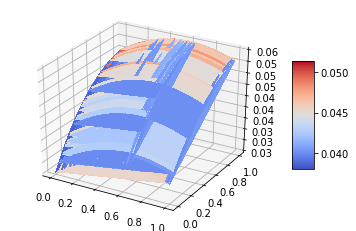

In [ ]:
graph_sol3D()
graph_sol2D()

In [ ]:
import matplotlib.pyplot as plt

#pt_x_fem1 = Variable(torch.from_numpy(x3).float(), requires_grad=False).to(device) 
#pt_x_fem2= Variable(torch.from_numpy(x4).float(), requires_grad=False).to(device)

fig = plt.figure(figsize=(9,6))
#plt.scatter(t_0, x_0, c=u_0, marker='X', vmin=-1, vmax=1)
#plt.scatter(x_bc, t_bc, marker='X', vmin=-1, vmax=1)
plt.scatter(x3, x4, c='r', marker='.', alpha=0.1)
plt.xlabel('$x1$')
plt.ylabel('$x2$')

plt.title('Positions of mesh_s nodes');

In [ ]:
(net(pt_x1,pt_x2)*pt_z).shape


torch.Size([111556, 3435])

In [ ]:
pt_z

In [ ]:
#Ici je recupere les resultats etat et je les importes côté matlab
#Enregistrer mon fichier sur colab
from google.colab import drive
drive.mount('/content/gdrive')

#Verifier quels fichiers ont été enregistrer
import os
#print( os.getcwd() )
print( os.listdir() )

# save to csv file
np.savetxt('pinn_eta.csv', ms_u, delimiter=',')
print( os.listdir() )
#Telecharger mon fichier
from google.colab import files
files.download( "pinn_eta.csv" )

In [ ]:
#exportation points de colocation 1 pour interpolation fem
#Enregistrer mon fichier sur colab
from google.colab import drive
drive.mount('/content/gdrive')

#Verifier quels fichiers ont été enregistrer
import os
#print( os.getcwd() )
print( os.listdir() )

# save to csv file
np.savetxt('grid1.csv', ms_x1, delimiter=',')
print( os.listdir() )
#Telecharger mon fichier
from google.colab import files
files.download( "grid1.csv" )

In [ ]:
#exportation points de colocation 2 pour interpolation fem
#Enregistrer mon fichier sur colab
from google.colab import drive
drive.mount('/content/gdrive')

#Verifier quels fichiers ont été enregistrer
import os
#print( os.getcwd() )
print( os.listdir() )

# save to csv file
np.savetxt('grid2.csv', ms_x2, delimiter=',')
print( os.listdir() )
#Telecharger mon fichier
from google.colab import files
files.download( "grid2.csv" )

In [ ]:
ms_x1-ms_x2

In [ ]:
    pt_bc, u_bc = training_bc(100)
    #x_bc,t_bc = pt_bc[:,0],pt_bc[:,1] pas bon ici, il nous faut un format ligne colonne
    #np.transpose(np.array([pt_bc[:,0]])) on applique cette transformation pour convertir
    x_bc,t_bc = np.transpose(np.array([pt_bc[:,0]])),np.transpose(np.array([pt_bc[:,1]]))

In [ ]:
#je prends ces résultats et je les projette surnun maillage EF

In [ ]:
#essai de la fonction interpolation
from scipy.interpolate import LSQSphereBivariateSpline
import matplotlib.pyplot as plt

In [ ]:
theta = np.linspace(0, np.pi, num=7)
phi = np.linspace(0, 2*np.pi, num=9)
data = np.empty((theta.shape[0], phi.shape[0]))
data[:,0], data[0,:], data[-1,:] = 0., 0., 0.
data[1:-1,1], data[1:-1,-1] = 1., 1.
data[1,1:-1], data[-2,1:-1] = 1., 1.
data[2:-2,2], data[2:-2,-2] = 2., 2.
data[2,2:-2], data[-3,2:-2] = 2., 2.
data[3,3:-2] = 3.
data = np.roll(data, 4, 1)


lats, lons = np.meshgrid(theta, phi)
knotst, knotsp = theta.copy(), phi.copy()
knotst[0] += .0001
knotst[-1] -= .0001
knotsp[0] += .0001
knotsp[-1] -= .0001
lut = LSQSphereBivariateSpline(lats.ravel(), lons.ravel(), data.T.ravel(), knotst, knotsp)
#lut(x, y) evalue l'interpolation de data sur les cordonées x et y
#lut(theta, phi) ex ici en theta et phi

In [ ]:
#data-lut(theta, phi)
lut(theta, phi).shape, theta.shape, phi.shape


In [ ]:
lut(x3, x4)

In [ ]:
data = np.roll(data, 4, 1)
data.shape
data

In [ ]:
#Fonction d'interpolation des points de colocations pinns vers le maillage EF
#coloc=colocations
eta_coloc=nn_out

#on supperpose les points de colocations Pinn et les noeuds de maillage Fem.
#Pour trouver les valeurs de NN_out dans le maillage fem on interpole.
#chaque noeuds FEM sera le centre d'un cercle et tous les pts de coloc qui se trouvent dans ce cercle seront 
#combinés linéairement pour créer une moyenne pondérée par la distance au centre du cercle.

def interpolation(eta_coloc,coloc,maillage_ef):
  return eta_mesh

In [ ]:
import matplotlib.pyplot as plt

#x = [1,2,3,4,5,6,7,8]
#y = [4,1,3,6,1,3,5,2]
x,y=x3,x4
plt.scatter(x,y)

plt.title('Nuage de points avec Matplotlib')
plt.xlabel('x')
plt.ylabel('y')

#plt.savefig('ScatterPlot_01.png')
plt.show()